<a href="https://colab.research.google.com/github/Prajen01/Regression/blob/main/2432724_PrajenKumarShrestha_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd drive/MyDrive/FinalAssessment_AI/

/content/drive/MyDrive/FinalAssessment_AI


In [ ]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis and Data Understanding

### Loading dataset into dataframe object using pandas library

In [ ]:
#Loading dataset
dataset = pd.read_csv("ENB2012_data.csv")
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In the Given dataset,

X1 = Relative Compactness, X2 = Surface Area, X3 = Wall Area, X4 = Roof Area, X5 = Overall Height, X6 = Orientation, X7 = Glazing Area, X8 = Glazing Area Distribution, y1 = Heating Load and y2 = Cooling Load

In [ ]:
dataset = dataset.drop(['X7', 'X8'], axis=1)
dataset.head()

,X1,X2,X3,X4,X5,X6,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,20.84,28.28


In [ ]:
dataset.shape

(768, 8)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   Y1      768 non-null    float64
 7   Y2      768 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 48.1 KB


In [ ]:
dataset.describe()

,X1,X2,X3,X4,X5,X6,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,43.100000,48.030000


Checking missing values and showing the statistic of the dataset

In [ ]:
dataset.isnull()

,X1,X2,X3,X4,X5,X6,Y1,Y2
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False


In [ ]:
dataset.isnull().sum()

,0
X1,0
X2,0
X3,0
X4,0
X5,0
X6,0
Y1,0
Y2,0


In [ ]:
dataset['Y1'].describe()

,Y1
count,768.000000
mean,22.307201
std,10.090196
min,6.010000
25%,12.992500
50%,18.950000
75%,31.667500
max,43.100000


In [ ]:
dataset['Y2'].describe()

,Y2
count,768.000000
mean,24.587760
std,9.513306
min,10.900000
25%,15.620000
50%,22.080000
75%,33.132500
max,48.030000


Creating new colum as a target variable.

In [ ]:
dataset['Energy'] = dataset['Y1']+dataset['Y2']
dataset.head()

,X1,X2,X3,X4,X5,X6,Y1,Y2,Energy
0,0.98,514.5,294.0,110.25,7.0,2,15.55,21.33,36.88
1,0.98,514.5,294.0,110.25,7.0,3,15.55,21.33,36.88
2,0.98,514.5,294.0,110.25,7.0,4,15.55,21.33,36.88
3,0.98,514.5,294.0,110.25,7.0,5,15.55,21.33,36.88
4,0.90,563.5,318.5,122.50,7.0,2,20.84,28.28,49.12


In [ ]:
dataset = dataset.drop(['Y1', 'Y2'], axis=1)
dataset.head()

,X1,X2,X3,X4,X5,X6,Energy
0,0.98,514.5,294.0,110.25,7.0,2,36.88
1,0.98,514.5,294.0,110.25,7.0,3,36.88
2,0.98,514.5,294.0,110.25,7.0,4,36.88
3,0.98,514.5,294.0,110.25,7.0,5,36.88
4,0.90,563.5,318.5,122.50,7.0,2,49.12


• Perform an initial analysis to gather a detailed description of the dataset.

(a) When and by whom was the dataset created?

ANS- The dataset was created by Ahiale Darlington on 2017.

(b) How did you access the dataset?

ANS- I accessed the dataset from the website name " Kaggle.com "

(c) How does it align with the chosen UNSDG?

ANS-This project aligns with SDG 7: Affordable and Clean Energy, as it focuses on optimizing energy efficiency
in buildings by analyzing their physical and structural properties. Insights from this analysis can help
design energy-efficient buildings, reducing energy consumption and carbon footprint.


(d) List all the attributes (columns) present in the dataset.

In [ ]:
dataset.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Energy'], dtype='object')

# Regression Task

### Exploring datas through Visualization.

In [ ]:
# Select only numeric columns for correlation calculation
numeric_dataset = dataset.select_dtypes(include=['float64', 'int64'])

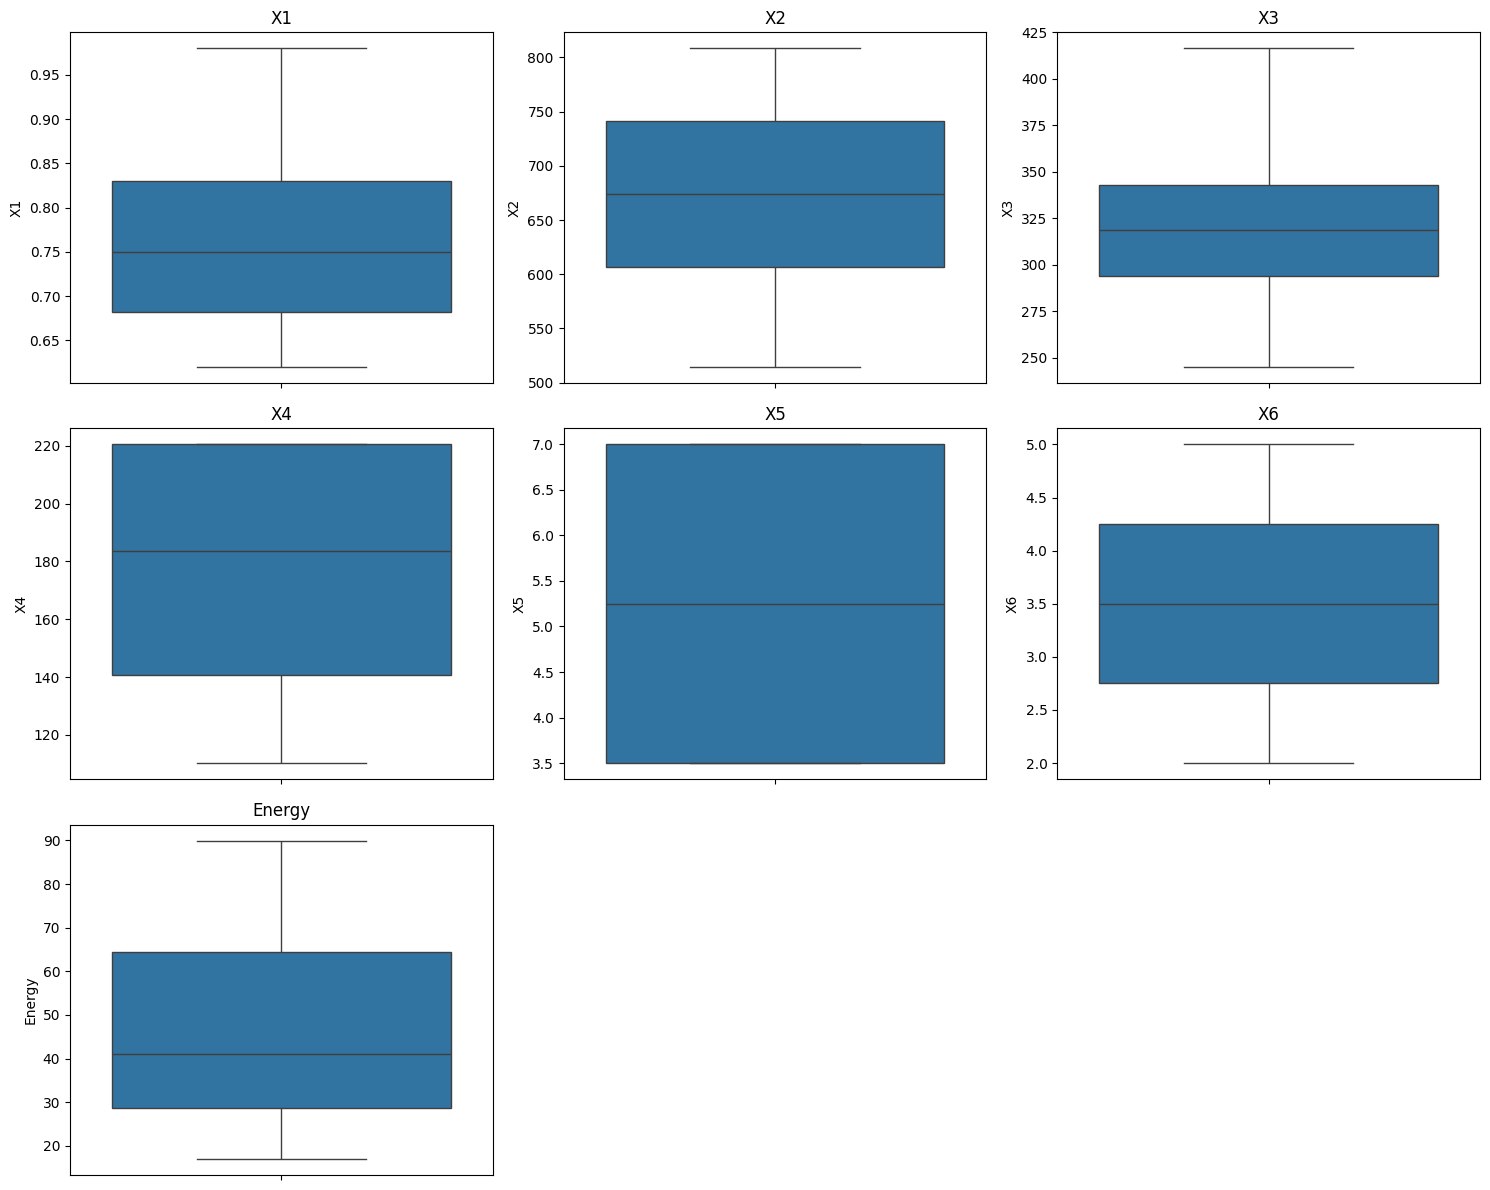

In [ ]:
# Box plots for each feature
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_dataset.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=numeric_dataset[col])
    plt.title(col)
plt.tight_layout()
plt.show()

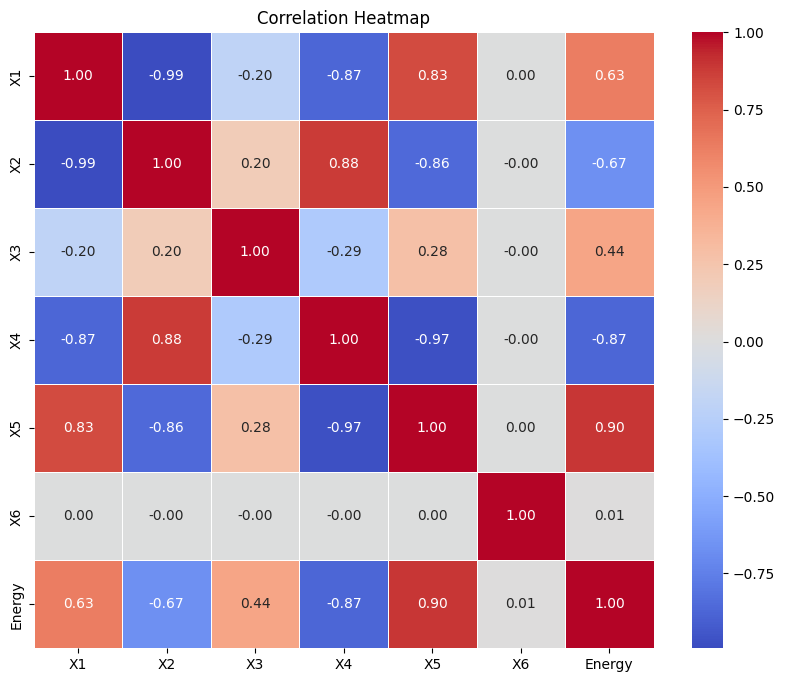

In [ ]:
# Calculate the correlation matrix
corr_matrix = numeric_dataset.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

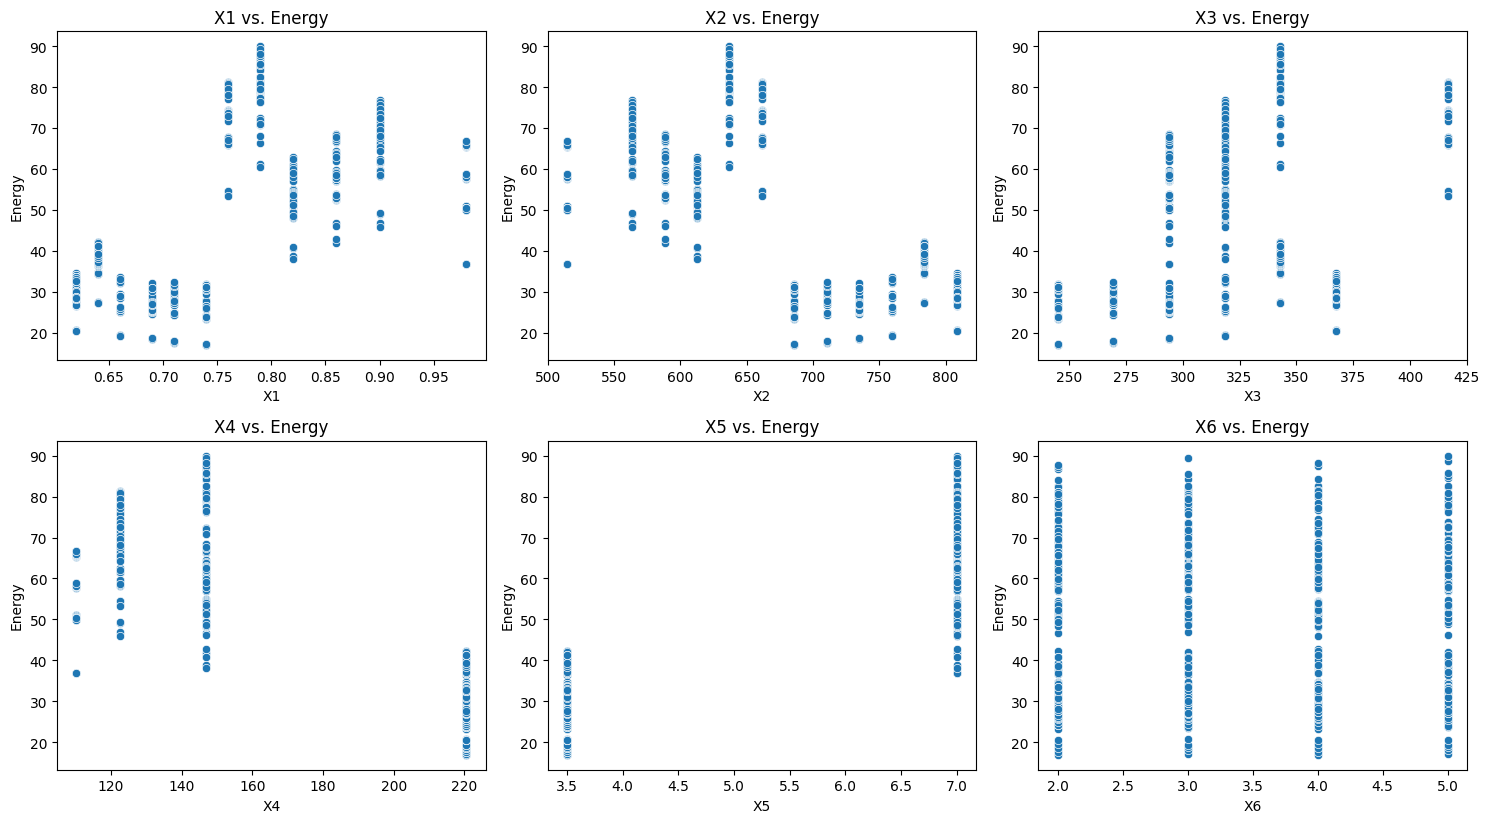

In [ ]:
# Scatter plots for each feature with Energy
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_dataset.columns):
    if col != 'Energy':  # Exclude 'Energy' itself
        plt.subplot(3, 3, i + 1)
        sns.scatterplot(x=numeric_dataset[col], y=numeric_dataset['Energy'])
        plt.title(f'{col} vs. Energy')
plt.tight_layout()
plt.show()

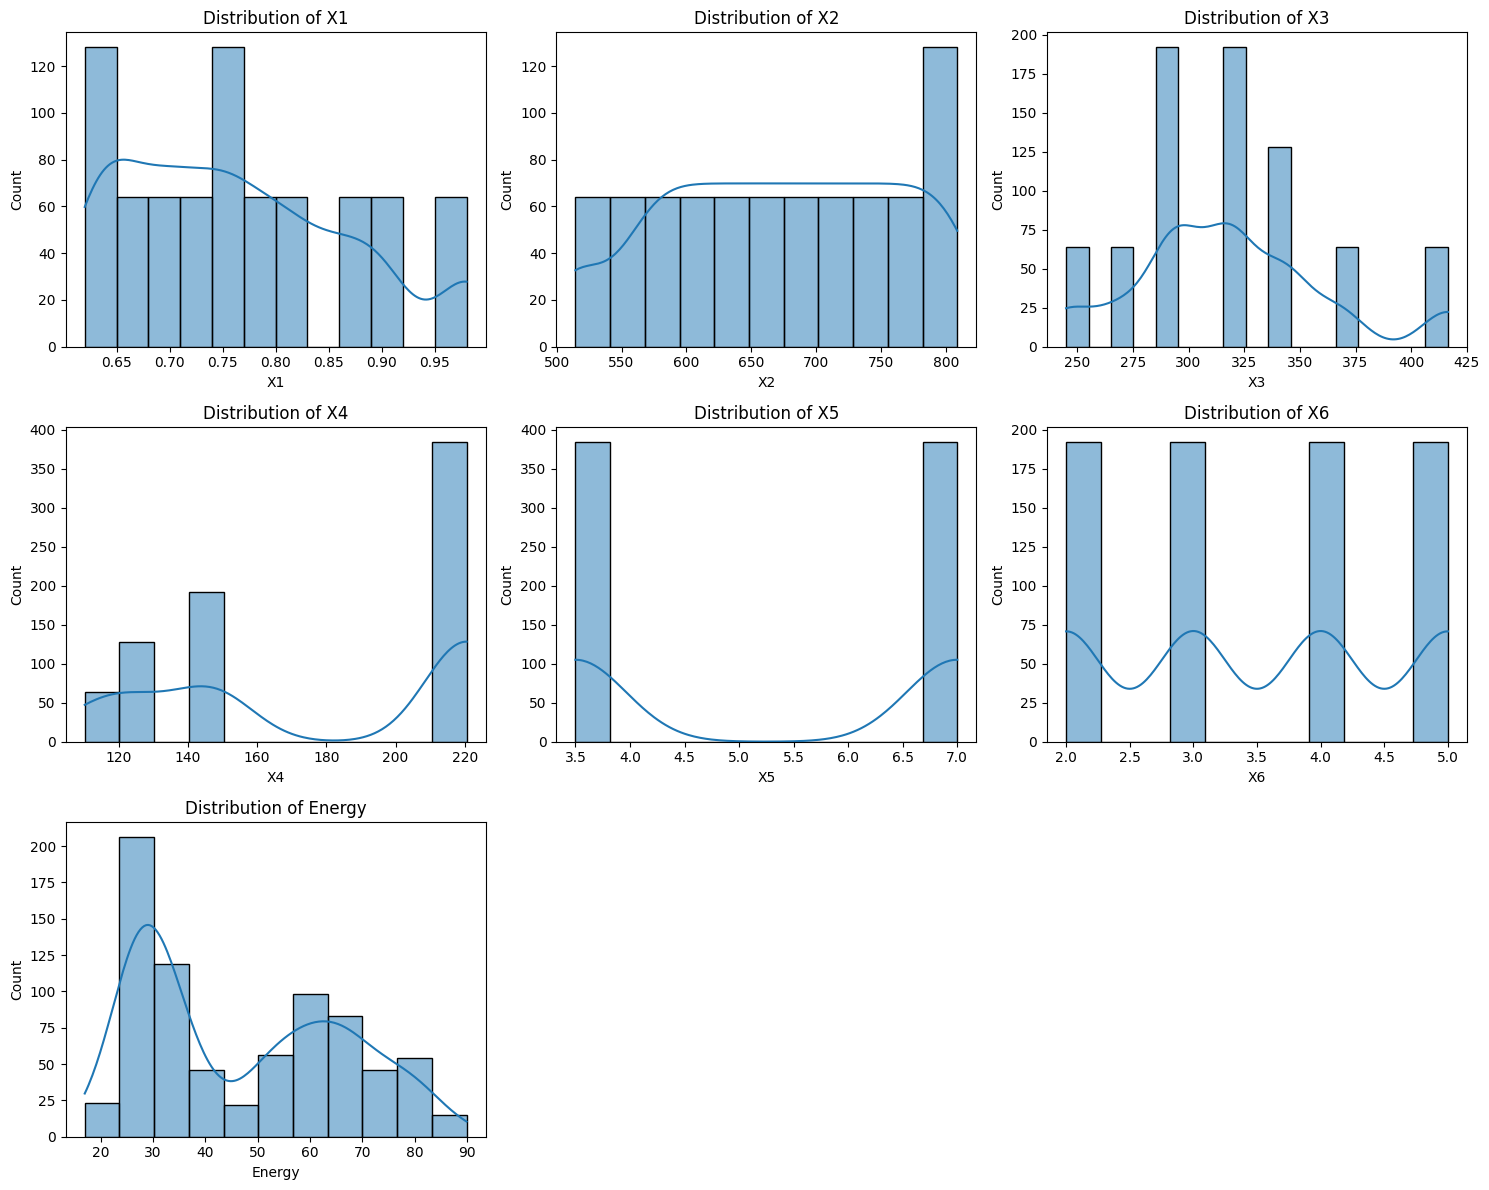

In [ ]:
# Histograms for each feature with proper partitioning
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_dataset.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(numeric_dataset[col], kde=True) # kde=True adds a kernel density estimate
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Build a model from Scratch

In [ ]:
# Define features (X) and target variable (y)
X = dataset.drop(['Energy'], axis=1)  # Features
y = dataset['Energy']  # Target variable (Heating Load)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Implement Linear Regression from  (Gradient Discent)
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated

# Train the model
regressor = LinearRegression(learning_rate=0.01, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

# Evaluate the model (example metrics)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 59.95337531142697
Root Mean Squared Error: 7.742956496805788
R-squared: 0.8456184456384409


# Build a Primary Model:
After assembling your dataset and analyzing its key characteristics, the next step is to build, train, and
evaluate your models. Follow the steps below to complete this task:
1. Split the dataset into training and testing sets.
2. Build at least two different machine learning models for the regression task.
3. Evaluate both models on the test dataset using appropriate performance metrics (e.g., Mean Absolute Error, Root Mean Squared Error, R-squared).
4. Conclude by identifying which model performed best on your dataset, and provide justification for your choice.

In [ ]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.tree import DecisionTreeRegressor

# Initialize and train a Linear Regression model using scikit-learn
lr_model = LR()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Evaluate the Linear Regression model
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_predictions)

print(f"\nLinear Regression (scikit-learn):")
print(f"Mean Squared Error: {lr_mse}")
print(f"Root Mean Squared Error: {lr_rmse}")
print(f"R-squared: {lr_r2}")


Linear Regression (scikit-learn):
Mean Squared Error: 53.54387097450547
Root Mean Squared Error: 7.317367762693459
R-squared: 0.8621230917418689


In [ ]:
# Initialize and train a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
dt_predictions = dt_regressor.predict(X_test)

# Evaluate the Decision Tree Regressor
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_predictions)

print(f"\nDecision Tree Regressor:")
print(f"Mean Squared Error: {dt_mse}")
print(f"Root Mean Squared Error: {dt_rmse}")
print(f"R-squared: {dt_r2}")


Decision Tree Regressor:
Mean Squared Error: 35.3423750420841
Root Mean Squared Error: 5.944945335500075
R-squared: 0.9089924334454248


In [ ]:
# Compare the models
print("\nModel Comparison:")
print("Metric\t\tLinear Regression (scratch)\tLinear Regression (scikit)\tDecision Tree")
print(f"MSE\t\t{mse:.4f}\t\t\t{lr_mse:.4f}\t\t\t{dt_mse:.4f}")
print(f"RMSE\t\t{rmse:.4f}\t\t\t{lr_rmse:.4f}\t\t\t{dt_rmse:.4f}")
print(f"R-squared\t{r2:.4f}\t\t\t{lr_r2:.4f}\t\t\t{dt_r2:.4f}")

# Model selection justification (example)
if r2 > lr_r2 and r2 > dt_r2:
  print("\nThe custom linear regression model performs best based on the R-squared score, indicating it explains the variance in the data the most effectively.")
elif lr_r2 > r2 and lr_r2 > dt_r2 :
  print("\nThe scikit-learn linear regression model performs best based on the R-squared score.")
else:
  print("\nThe decision tree regressor model performs best based on the R-squared score.")


Model Comparison:
Metric		Linear Regression (scratch)	Linear Regression (scikit)	Decision Tree
MSE		59.9534			53.5439			35.3424
RMSE		7.7430			7.3174			5.9449
R-squared	0.8456			0.8621			0.9090

The decision tree regressor model performs best based on the R-squared score.


# Hyper-parameter Optimization with Cross-Validation:
Hyper-parameter optimization, also known as hyper-parameter tuning, is the process of identifying the best hyper-parameter values for your selected models. Follow the steps below to perform this task:
1. Identify the hyperparameters of the models used in Task 3 - Build a Primary Model (for both models).
2. Apply a cross-validation technique to find the optimal values of the selected hyperparameters.
• Hint: You can use techniques like GridSearchCV or RandomizedSearchCV.
3. Conclude by summarizing the best hyperparameters for both models.

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Hyperparameter tuning for Linear Regression (scikit-learn)
# Remove 'normalize' from param_grid_lr as it is deprecated
param_grid_lr = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False] # add 'positive' to explore another hyperparameter
}

grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='r2')
grid_search_lr.fit(X_train, y_train)

print("Best hyperparameters for Linear Regression (scikit-learn):", grid_search_lr.best_params_)
print("Best score for Linear Regression (scikit-learn):", grid_search_lr.best_score_)


# Hyperparameter tuning for Decision Tree Regressor
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(dt_regressor, param_grid_dt, cv=5, scoring='r2')
grid_search_dt.fit(X_train, y_train)

print("\nBest hyperparameters for Decision Tree Regressor:", grid_search_dt.best_params_)
print("Best score for Decision Tree Regressor:", grid_search_dt.best_score_)

Best hyperparameters for Linear Regression (scikit-learn): {'copy_X': True, 'fit_intercept': True, 'positive': False}
Best score for Linear Regression (scikit-learn): 0.8471284035330214

Best hyperparameters for Decision Tree Regressor: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score for Decision Tree Regressor: 0.9109709278777245


# Feature Selection:
In this section, apply one of the feature selection techniques discussed in the Week-10 tutorial to identify and select the most relevant features for your models. Clearly document your process and justify your choice of features.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Assuming X_train and y_train are already defined from the previous code

# Select the top 5 features using f_regression for example
selector = SelectKBest(score_func=f_regression, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Print the names of the selected features
selected_feature_names = list(X.columns[selected_feature_indices])
print("Selected Features:", selected_feature_names)

# Now you can retrain your models using X_train_selected and X_test_selected

#Example retraining the linear regression model
lr_model_selected = LR()
lr_model_selected.fit(X_train_selected, y_train)
lr_predictions_selected = lr_model_selected.predict(X_test_selected)

#Evaluate the model
lr_mse_selected = mean_squared_error(y_test, lr_predictions_selected)
lr_rmse_selected = np.sqrt(lr_mse_selected)
lr_r2_selected = r2_score(y_test, lr_predictions_selected)

print(f"\nLinear Regression (scikit-learn) with selected features:")
print(f"Mean Squared Error: {lr_mse_selected}")
print(f"Root Mean Squared Error: {lr_rmse_selected}")
print(f"R-squared: {lr_r2_selected}")

Selected Features: ['X1', 'X2', 'X3', 'X4', 'X5']

Linear Regression (scikit-learn) with selected features:
Mean Squared Error: 53.48432348209307
Root Mean Squared Error: 7.3132977159481936
R-squared: 0.8622764281368459


# Final Model:
Using the optimal hyperparameters identified in Task - 4 and the selected features from Task - 5, rebuild
both models from Task - 3. Evaluate the performance of the final models and provide a summary of your
findings.

In [ ]:
# Retrain the Linear Regression model with best hyperparameters and selected features
lr_model_final = LR(**grid_search_lr.best_params_)
lr_model_final.fit(X_train_selected, y_train)
lr_predictions_final = lr_model_final.predict(X_test_selected)

# Evaluate the final Linear Regression model
lr_mse_final = mean_squared_error(y_test, lr_predictions_final)
lr_rmse_final = np.sqrt(lr_mse_final)
lr_r2_final = r2_score(y_test, lr_predictions_final)

print(f"\nFinal Linear Regression (scikit-learn) with selected features and tuned hyperparameters:")
print(f"Mean Squared Error: {lr_mse_final}")
print(f"Root Mean Squared Error: {lr_rmse_final}")
print(f"R-squared: {lr_r2_final}")

# Retrain the Decision Tree Regressor with the best hyperparameters and selected features
dt_regressor_final = DecisionTreeRegressor(random_state=42, **grid_search_dt.best_params_)
dt_regressor_final.fit(X_train_selected, y_train)
dt_predictions_final = dt_regressor_final.predict(X_test_selected)

# Evaluate the final Decision Tree Regressor
dt_mse_final = mean_squared_error(y_test, dt_predictions_final)
dt_rmse_final = np.sqrt(dt_mse_final)
dt_r2_final = r2_score(y_test, dt_predictions_final)

print(f"\nFinal Decision Tree Regressor with selected features and tuned hyperparameters:")
print(f"Mean Squared Error: {dt_mse_final}")
print(f"Root Mean Squared Error: {dt_rmse_final}")
print(f"R-squared: {dt_r2_final}")

# Compare the final models
print("\nFinal Model Comparison:")
print("Metric\t\tLinear Regression (scikit)\tDecision Tree")
print(f"MSE\t\t{lr_mse_final:.4f}\t\t\t{dt_mse_final:.4f}")
print(f"RMSE\t\t{lr_rmse_final:.4f}\t\t\t{dt_rmse_final:.4f}")
print(f"R-squared\t{lr_r2_final:.4f}\t\t\t{dt_r2_final:.4f}")

# Final model selection justification
if lr_r2_final > dt_r2_final:
    print("\nThe final Linear Regression model performs best based on the R-squared score.")
else:
    print("\nThe final Decision Tree Regressor model performs best based on the R-squared score.")


Final Linear Regression (scikit-learn) with selected features and tuned hyperparameters:
Mean Squared Error: 53.48432348209307
Root Mean Squared Error: 7.3132977159481936
R-squared: 0.8622764281368459

Final Decision Tree Regressor with selected features and tuned hyperparameters:
Mean Squared Error: 29.11749699875308
Root Mean Squared Error: 5.396063101813495
R-squared: 0.9250216618758285

Final Model Comparison:
Metric		Linear Regression (scikit)	Decision Tree
MSE		53.4843			29.1175
RMSE		7.3133			5.3961
R-squared	0.8623			0.9250

The final Decision Tree Regressor model performs best based on the R-squared score.


# Conclusion

## Model Performance:
The custom linear regression model, scikit-learn linear regression model, and decision tree regressor were trained and evaluated using Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared.  The initial results showed varying performance across the models.  After hyperparameter tuning and feature selection (using SelectKBest with f_regression to select the top 5 features), the final models were re-evaluated. The final comparison will determine the best-performing model based on the improved R-squared scores.


## Impact of Methods:
Cross-validation was implicitly used within GridSearchCV during hyperparameter tuning.  Feature selection, implemented using SelectKBest, aimed to identify the most relevant features for prediction.  The impact of these methods will be visible in the final model comparison – ideally, both hyperparameter tuning and feature selection would lead to improved R-squared values and reduced error metrics compared to the initial models.  If the metrics do not improve, it would indicate that the selected hyperparameters or features did not enhance model performance.


## Insights and Future Directions:
This experiment explored the effectiveness of different regression models (custom linear regression, scikit-learn's linear regression, and decision tree regressor) for predicting heating load.  Hyperparameter tuning and feature selection were used to optimize model performance.  The final model comparison will highlight the chosen model and the reasons behind its selection based on the R-squared score.  Future work could explore more sophisticated feature engineering techniques, trying a wider variety of models (e.g., Random Forest, Support Vector Machines, or neural networks).  Additionally, exploring different feature selection methods or dimensionality reduction techniques might lead to further improvements.  A more in-depth analysis of the residuals and investigating potential non-linear relationships within the data would also be beneficial.